In [1]:
import pandas as pd
broadway = pd.read_csv("original_broadway.csv")
print(broadway.keys())
# listing columns header names

Index(['Date.Day', 'Date.Full', 'Date.Month', 'Date.Year', 'Show.Name',
       'Show.Theatre', 'Show.Type', 'Statistics.Attendance',
       'Statistics.Capacity', 'Statistics.Gross', 'Statistics.Gross Potential',
       'Statistics.Performances'],
      dtype='object')


In [2]:
# check for blanks
broadway.info()
# No blank fields
# check for null values
broadway.isnull().any()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31296 entries, 0 to 31295
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date.Day                    31296 non-null  int64 
 1   Date.Full                   31296 non-null  object
 2   Date.Month                  31296 non-null  int64 
 3   Date.Year                   31296 non-null  int64 
 4   Show.Name                   31296 non-null  object
 5   Show.Theatre                31296 non-null  object
 6   Show.Type                   31296 non-null  object
 7   Statistics.Attendance       31296 non-null  int64 
 8   Statistics.Capacity         31296 non-null  int64 
 9   Statistics.Gross            31296 non-null  int64 
 10  Statistics.Gross Potential  31296 non-null  int64 
 11  Statistics.Performances     31296 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 2.9+ MB


Date.Day                      False
Date.Full                     False
Date.Month                    False
Date.Year                     False
Show.Name                     False
Show.Theatre                  False
Show.Type                     False
Statistics.Attendance         False
Statistics.Capacity           False
Statistics.Gross              False
Statistics.Gross Potential    False
Statistics.Performances       False
dtype: bool

In [3]:
#checking for duplicates
duplicates = broadway.duplicated()
sum(duplicates)
# no duplicates in data set

0

In [4]:
# splitting column names
import re
broadway.columns=[re.split(r'[.]', col)[1] for col in broadway.columns]
broadway.head(5)
broadway.tail(5)


,Day,Full,Month,Year,Name,Theatre,Type,Attendance,Capacity,Gross,Gross Potential,Performances
31291,14,8/14/2016,8,2016,The Humans,Schoenfeld,Play,7234,87,603770,62,8
31292,14,8/14/2016,8,2016,The Lion King,Minskoff,Musical,13485,99,2233894,97,8
31293,14,8/14/2016,8,2016,The Phantom Of The Opera,Majestic,Musical,10966,85,999632,66,8
31294,14,8/14/2016,8,2016,Waitress,Brooks Atkinson,Musical,8058,96,990128,97,8
31295,14,8/14/2016,8,2016,Wicked,Gershwin,Musical,13804,95,1779664,100,8


In [5]:
# convert all text to lower case
broadway.Name.apply(lambda x: x.lower())
broadway.Theatre.apply(lambda x: x.lower())
broadway.Type.apply(lambda x: x.lower())

0           play
1        musical
2        musical
3        musical
4        musical
          ...   
31291       play
31292    musical
31293    musical
31294    musical
31295    musical
Name: Type, Length: 31296, dtype: object

In [6]:
#import modules
import scipy as stats
import numpy as np

array([[<AxesSubplot: title={'center': 'Attendance'}>]], dtype=object)

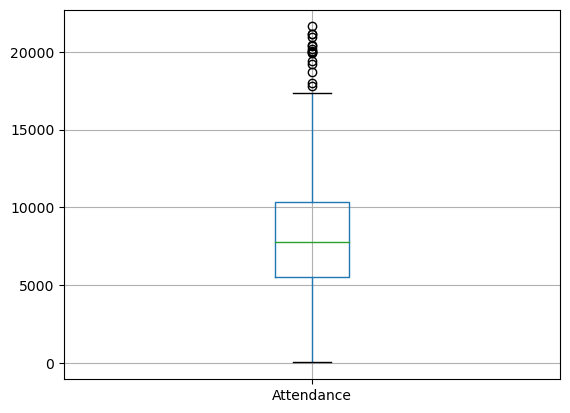

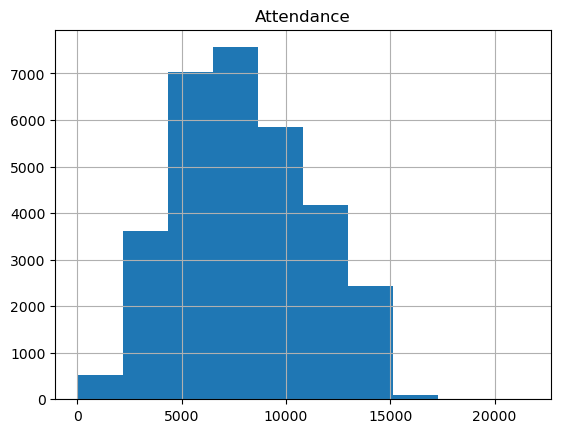

In [7]:
# visualizations
broadway.boxplot('Attendance')
broadway.hist('Attendance')

In [8]:
broadway_outliers = broadway[(broadway.Attendance < broadway.Attendance.quantile(.995)) & (broadway.Attendance > broadway.Attendance.quantile(.005))]

In [13]:
broadway_outliers.hist('Attendance')

array([[<AxesSubplot: title={'center': 'Attendance'}>]], dtype=object)

In [9]:
# visualizations
broadway_outliers.boxplot('Attendance')
broadway_outliers.hist('Attendance')

array([[<AxesSubplot: title={'center': 'Attendance'}>]], dtype=object)

In [10]:
#broadway.drop(axis='columns', labels=(["Gross Potential", "Capacity"]), inplace=True)
# dropping capacity because in initial review in Excel, there were percentages over 100% and appears to have 
# erroneous data.  Removing Gross Potential because it is based on the max the performace could gross
# that week.  However, if the data is unavailable, the default was set to zero.  There were several 0's
# in the data. This could skew my analysis.

In [11]:
#broadway.describe()

In [12]:
#broadway.corr()